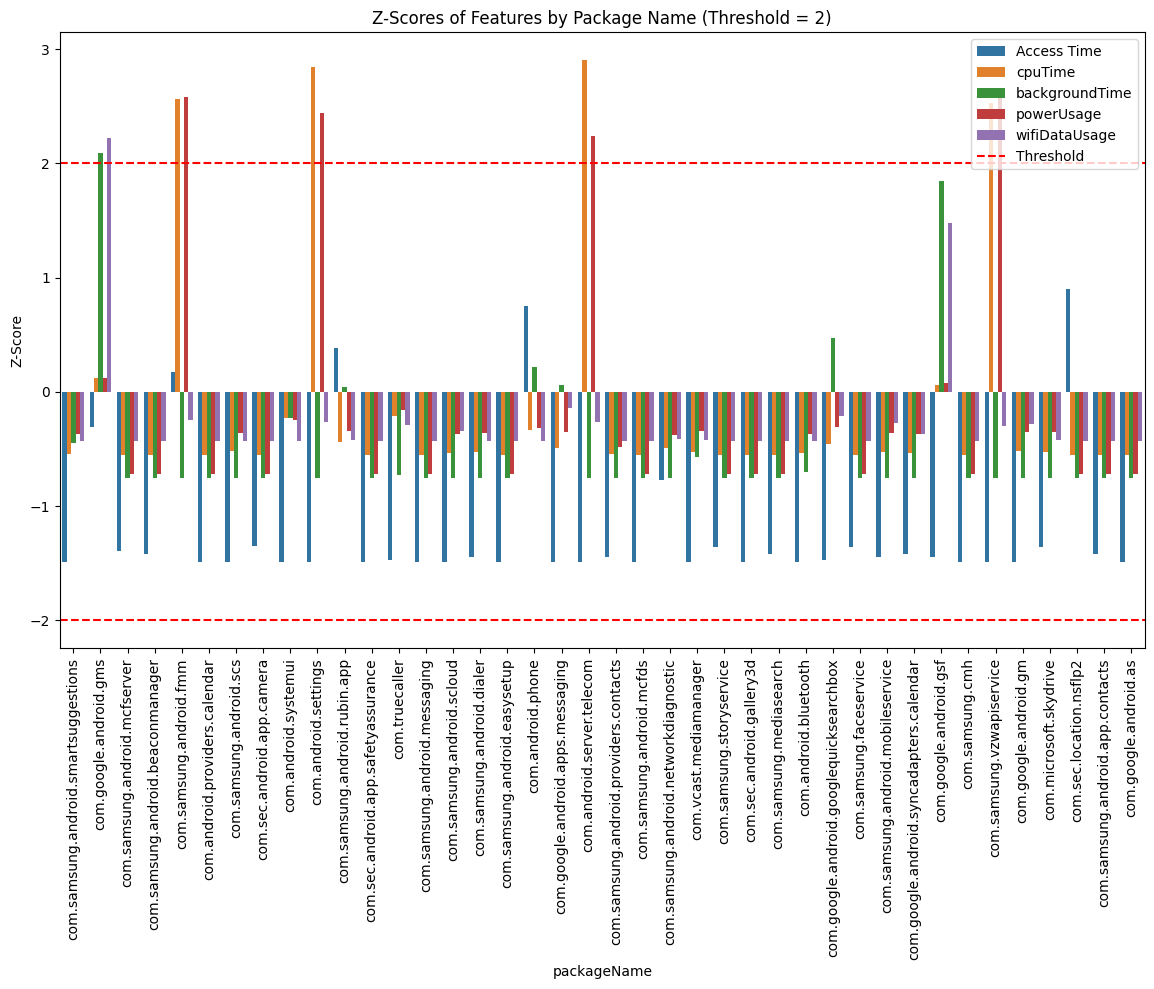

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = 'data_zscore_1.csv'
data = pd.read_csv(file_path)

# Select relevant columns for analysis
columns_to_analyze = ['Access Time', 'cpuTime', 'backgroundTime', 'powerUsage', 'wifiDataUsage']
data_filtered = data[columns_to_analyze].copy()

# Calculate z-scores for the selected features
z_scores = data_filtered.apply(zscore)

# Add the packageName to the z_scores dataframe for grouping in the plots
z_scores['packageName'] = data['packageName']

# Melt the dataframe for easier plotting with seaborn
z_scores_melted = z_scores.melt(id_vars=['packageName'], var_name='Feature', value_name='Z-Score')

# Bar plot of z-scores with respect to each packageName
plt.figure(figsize=(14, 8))
sns.barplot(x='packageName', y='Z-Score', hue='Feature', data=z_scores_melted, errorbar=None)
plt.axhline(y=2, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-2, color='r', linestyle='--')
plt.title('Z-Scores of Features by Package Name (Threshold = 2)')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


# Outliers in Each Feature

Outliers are data points that deviate significantly from other observations in the dataset. In the context of z-scores, an outlier typically has a z-score greater than 2 or less than -2, indicating it is more than two standard deviations away from the mean. Let's analyze each feature to identify outliers:

1. **Access Time**: Measures the time an app is accessed. Outliers here could indicate unusually high or low access times compared to the norm.
   - **High outliers** (z-score > 2): These indicate apps accessed much more frequently than usual.
   - **Low outliers** (z-score < -2): These indicate apps accessed much less frequently than usual.

2. **CPU Time**: Measures the CPU usage time by the app. Outliers could indicate apps using an unusually high or low amount of CPU time.
   - **High outliers** (z-score > 2): These indicate apps consuming significantly more CPU time.
   - **Low outliers** (z-score < -2): These indicate apps consuming significantly less CPU time.

3. **Background Time**: Measures the time an app runs in the background. Outliers here could indicate apps with unusually high or low background running times.
   - **High outliers** (z-score > 2): These indicate apps running in the background much longer than usual.
   - **Low outliers** (z-score < -2): These indicate apps running in the background much shorter than usual.

4. **Power Usage**: Measures the power consumed by the app. Outliers could indicate apps consuming an unusually high or low amount of power.
   - **High outliers** (z-score > 2): These indicate apps with significantly higher power consumption.
   - **Low outliers** (z-score < -2): These indicate apps with significantly lower power consumption.

5. **WiFi Data Usage**: Measures the WiFi data usage by the app. Outliers here could indicate apps using an unusually high or low amount of WiFi data.
   - **High outliers** (z-score > 2): These indicate apps consuming significantly more WiFi data.
   - **Low outliers** (z-score < -2): These indicate apps consuming significantly less WiFi data.


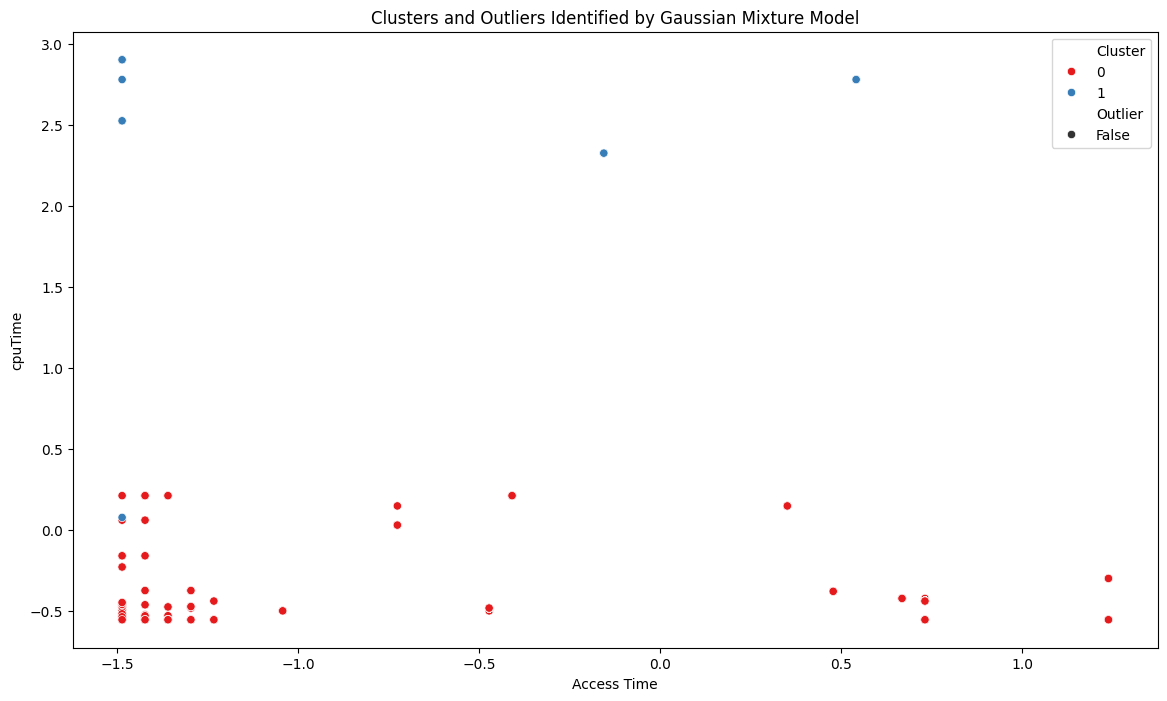

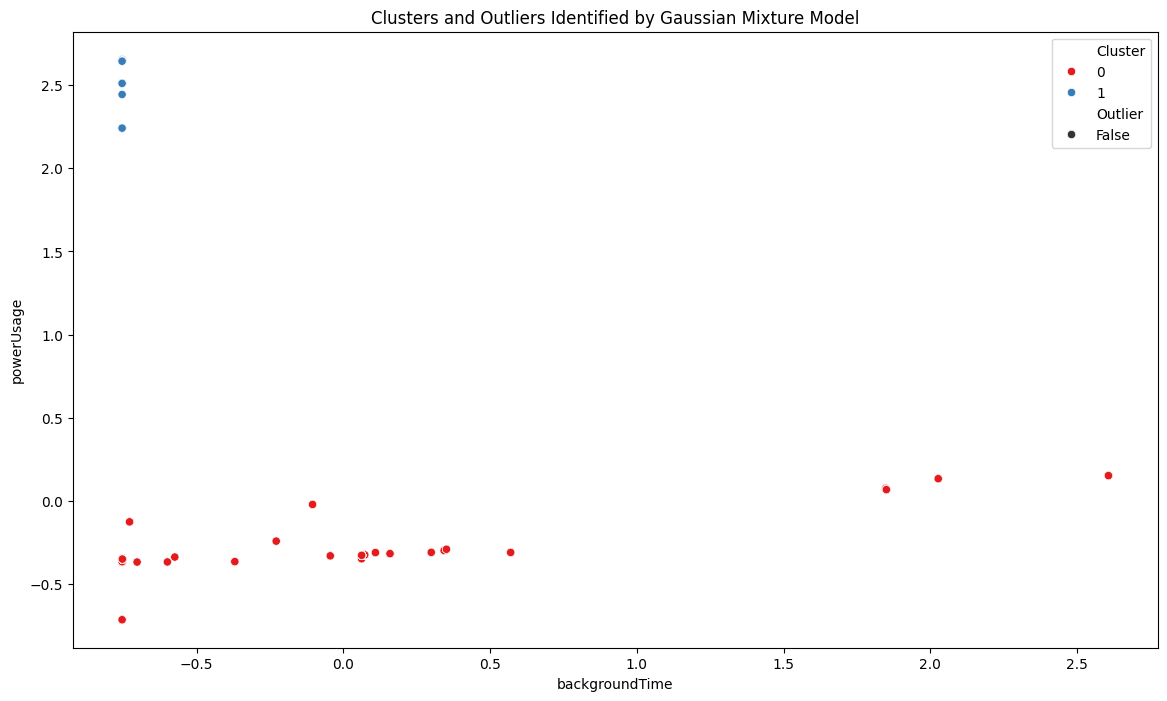

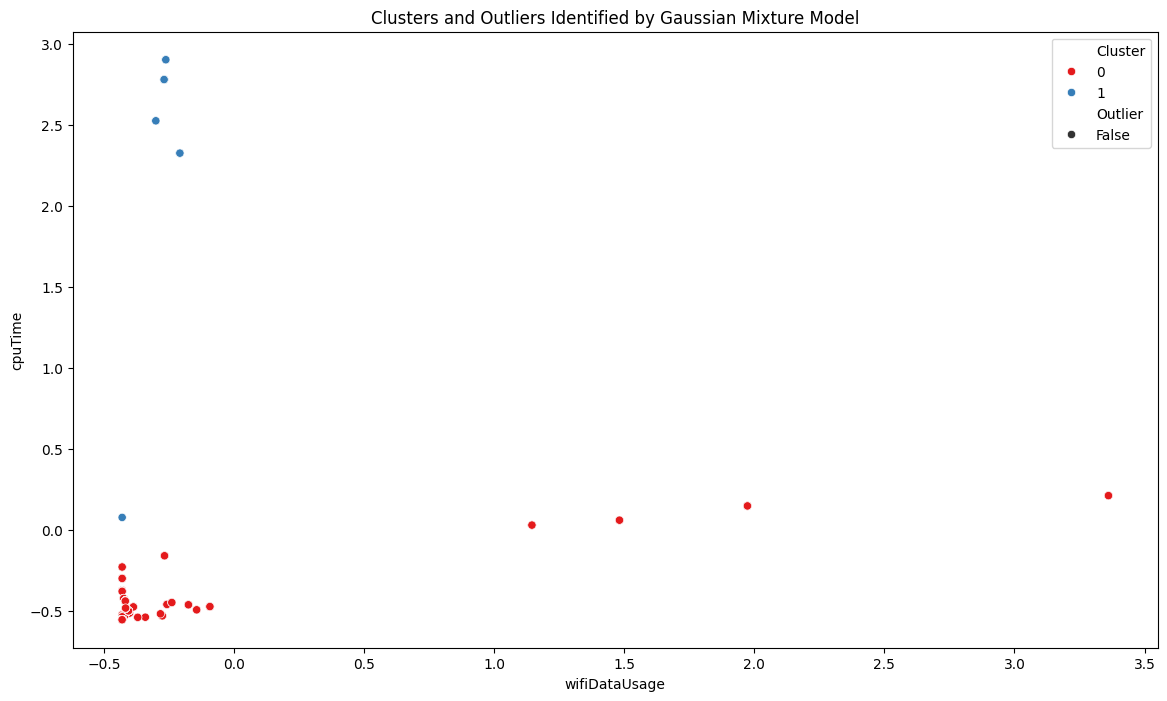

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = 'data_zscore_1.csv'
data = pd.read_csv(file_path)

# Select relevant columns for analysis
columns_to_analyze = ['Access Time', 'cpuTime', 'backgroundTime', 'powerUsage', 'wifiDataUsage']
data_filtered = data[columns_to_analyze].copy()

# Calculate z-scores for the selected features
z_scores = data_filtered.apply(zscore)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(z_scores[columns_to_analyze])

# Predict the clusters
z_scores['Cluster'] = gmm.predict(z_scores[columns_to_analyze])
z_scores['Probability'] = gmm.predict_proba(z_scores[columns_to_analyze]).max(axis=1)

# Identify outliers as points with low probability of belonging to any cluster
threshold = 0.05
z_scores['Outlier'] = z_scores['Probability'] < threshold

# Plot the clusters and highlight outliers
plt.figure(figsize=(14, 8))
sns.scatterplot(data=z_scores, x='Access Time', y='cpuTime', hue='Cluster', style='Outlier', palette='Set1')
plt.title('Clusters and Outliers Identified by Gaussian Mixture Model')
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=z_scores, x='backgroundTime', y='powerUsage', hue='Cluster', style='Outlier', palette='Set1')
plt.title('Clusters and Outliers Identified by Gaussian Mixture Model')
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=z_scores, x='wifiDataUsage', y='cpuTime', hue='Cluster', style='Outlier', palette='Set1')
plt.title('Clusters and Outliers Identified by Gaussian Mixture Model')
plt.show()


### Clusters and Outliers Identified by Gaussian Mixture Model

The following plots visualize the clusters and outliers identified by the Gaussian Mixture Model (GMM) on the given dataset:

1. **Access Time vs. CPU Time**:
   ![Access Time vs. CPU Time](sandbox:/mnt/data/plt1.png)
   - Each point represents a data entry.
   - Colors represent different clusters:
     - **0**: Cluster 0
     - **1**: Cluster 1
   - Markers indicate whether a point is an outlier.

2. **Background Time vs. Power Usage**:
   ![Background Time vs. Power Usage](sandbox:/mnt/data/plt2.png)
   - Each point represents a data entry.
   - Colors represent different clusters:
     - **0**: Cluster 0
     - **1**: Cluster 1
   - Markers indicate whether a point is an outlier.

3. **WiFi Data Usage vs. CPU Time**:
   ![WiFi Data Usage vs. CPU Time](sandbox:/mnt/data/plt3.png)
   - Each point represents a data entry.
   - Colors represent different clusters:
     - **0**: Cluster 0
     - **1**: Cluster 1
   - Markers indicate whether a point is an outlier.

### Interpretation

- **Clusters**: The data points are grouped into clusters based on their similarity. The GMM assigns each data point to a cluster (`0` or `1`).
- **Outliers**: Data points with a low probability of belonging to any cluster are marked as outliers. These are points that deviate significantly from the norm.
- **Visualization**: The scatter plots provide a clear visual representation of how the data points are clustered and which points are considered outliers.

These plots help in understanding the structure of the data and identifying any anomalies that might require further investigation.


## Basic Analytics 

In [96]:
import pandas as pd

# Load the CSV file
file_path = 'data_zscore_1.csv'
data = pd.read_csv(file_path)

# Count the number of unique apps and get their names
unique_apps = data['packageName'].unique()
unique_apps_count = len(unique_apps)

# Print the results
print(f"Number of unique apps: {unique_apps_count}")
print("Names of unique apps:")
for app in unique_apps:
    print(app)


Number of unique apps: 40
Names of unique apps:
com.samsung.android.smartsuggestions
com.google.android.gms
com.samsung.android.mcfserver
com.samsung.android.beaconmanager
com.samsung.android.fmm
com.android.providers.calendar
com.samsung.android.scs
com.sec.android.app.camera
com.android.systemui
com.android.settings
com.samsung.android.rubin.app
com.sec.android.app.safetyassurance
com.truecaller
com.samsung.android.messaging
com.samsung.android.scloud
com.samsung.android.dialer
com.samsung.android.easysetup
com.android.phone
com.google.android.apps.messaging
com.android.server.telecom
com.samsung.android.providers.contacts
com.samsung.android.mcfds
com.samsung.android.networkdiagnostic
com.vcast.mediamanager
com.samsung.storyservice
com.sec.android.gallery3d
com.samsung.mediasearch
com.android.bluetooth
com.google.android.googlequicksearchbox
com.samsung.faceservice
com.samsung.android.mobileservice
com.google.android.syncadapters.calendar
com.google.android.gsf
com.samsung.cmh
com.s

Summary Statistics:


,id,Date,timeStamp,uid,appCategory,Access Time,appTrustLevel,lastTimeForegroundServiceUsed,totalTimeForegroundServiceUsed,totalTimeInForeground,...,powerUsage,screenPowerUsage,mobileDataUsage,wifiDataUsage,accessibilityServiceEnabled,getCapabilities,active,isAppInBackground,lastUpdateTime,firstInstallTime
count,504.000000,504.000000,504,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,5.040000e+02,...,504.000000,504.000000,504.000000,504.000000,504.0,504.0,504.0,504.000000,5.040000e+02,5.040000e+02
mean,252.500000,2146.882937,2024-06-28 03:16:23.333333248,6262.061508,0.511905,24.464286,0.013889,8.190022e+10,468.823413,5.856689e+04,...,1.097091,-0.257937,-0.257937,2080.648810,0.0,-1.0,1.0,0.652778,1.653480e+12,1.638834e+12
min,1.000000,207.000000,2024-06-25 15:40:00,1000.000000,-1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.0,1.0,0.000000,0.000000e+00,0.000000e+00
25%,126.750000,2606.000000,2024-06-26 13:53:20,1001.000000,-1.000000,4.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.0,1.0,0.000000,1.641000e+12,1.641000e+12
50%,252.500000,2606.000000,2024-06-27 09:20:00,5023.000000,-1.000000,32.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.165038,0.000000,0.000000,29.000000,0.0,-1.0,1.0,1.000000,1.641000e+12,1.641000e+12
75%,378.250000,2706.000000,2024-06-27 14:53:20,10112.000000,-1.000000,36.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,1.292558,0.000000,0.000000,781.000000,0.0,-1.0,1.0,1.000000,1.641000e+12,1.641000e+12
max,504.000000,2806.000000,2024-07-02 14:20:00,10329.000000,7.000000,44.000000,1.000000,1.719930e+12,28055.000000,1.710803e+06,...,8.868578,0.000000,0.000000,18365.000000,0.0,-1.0,1.0,1.000000,1.719920e+12,1.719500e+12
std,145.636534,997.719778,NaN,3935.632576,3.087179,15.800279,0.117146,3.666328e+11,2733.132858,1.867695e+05,...,2.931822,0.437934,0.437934,4849.386792,0.0,0.0,0.0,0.476560,8.022309e+10,7.372040e+10



Top Apps by Frequency:


packageName
com.sec.location.nsflp2                    84
com.samsung.android.rubin.app              84
com.android.phone                          82
com.google.android.gms                     73
com.samsung.android.fmm                    58
com.samsung.android.networkdiagnostic      30
com.sec.android.app.camera                 15
com.google.android.googlequicksearchbox    11
com.truecaller                              7
com.samsung.android.mcfserver               4
Name: count, dtype: int64


Permission Access Trends:


op,Calendar,Call logs,Camera,Contacts,Location,Microphone,Music and audio,Nearby devices,Phone,Photos and videos,Physical activity,SMS
Date,,,,,,,,,,,,
207,7.0,10.0,4.0,16.0,26.0,1.0,1.0,13.0,7.0,14.0,1.0,5.0
2506,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2606,0.0,0.0,0.0,0.0,169.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.0,0.0,3.0,4.0,188.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0
2806,0.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0



Increased Usage Apps:


,cpuTime,powerUsage,wifiDataUsage,permissionCount
packageName,,,,
com.google.android.gms,59653.041096,1.448125,12829.027397,73
com.google.android.googlequicksearchbox,8471.818182,0.205080,1068.727273,11
com.google.android.gsf,54586.000000,1.313585,9260.000000,3
com.microsoft.skydrive,2190.000000,0.065389,45.000000,3
com.samsung.android.fmm,276537.206897,8.664572,876.948276,58
com.samsung.android.mobileservice,2121.000000,0.029192,748.000000,3
com.samsung.android.rubin.app,10058.809524,0.102248,57.571429,84
com.truecaller,30280.571429,0.624277,676.285714,7


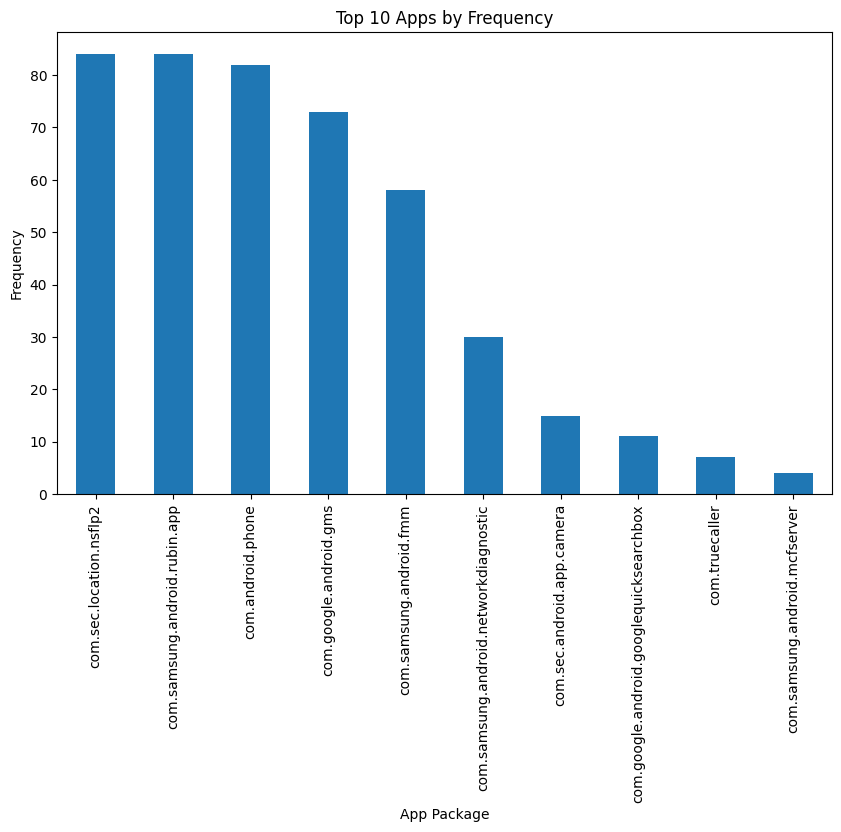

<Figure size 1200x800 with 0 Axes>

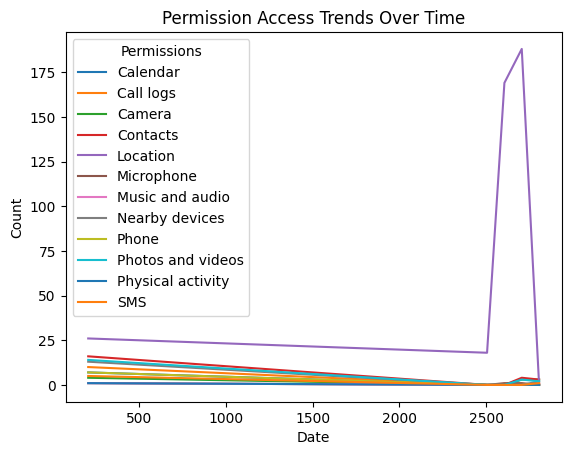

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_zscore_1.csv'  # Ensure this file is in the same directory
data = pd.read_csv(file_path)

# Convert timeStamp to readable datetime format
data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='ms')

# Basic Analytics

# 1. Summary Statistics
summary_statistics = data.describe()

# 2. Top Apps by Frequency
top_apps = data['packageName'].value_counts().head(10)

# 3. Permission Access Trends
permission_trends = data.groupby('Date')['op'].value_counts().unstack().fillna(0)

# Analyzing Increased Permission Access with Increased CPU, Power, and Wi-Fi Usage

# Calculate mean CPU, power, and Wi-Fi usage for each app
usage_means = data.groupby('packageName')[['cpuTime', 'powerUsage', 'wifiDataUsage']].mean()

# Identify apps with increased permission access (we'll assume 'op' indicates permission access)
# We will calculate the total count of permissions accessed by each app
permission_counts = data.groupby('packageName')['op'].count()

# Combine the data
combined_data = usage_means.join(permission_counts.rename('permissionCount'))

# Let's say an increase is defined as being above the median of the entire dataset
cpu_median = combined_data['cpuTime'].median()
power_median = combined_data['powerUsage'].median()
wifi_median = combined_data['wifiDataUsage'].median()
permission_median = combined_data['permissionCount'].median()

# Filter apps with increased permission access and increased CPU, power, and Wi-Fi usage
increased_usage_apps = combined_data[
    (combined_data['cpuTime'] > cpu_median) & 
    (combined_data['powerUsage'] > power_median) & 
    (combined_data['wifiDataUsage'] > wifi_median) & 
    (combined_data['permissionCount'] > permission_median)
]

# Display the results in a nice format
from IPython.display import display

print("Summary Statistics:")
display(summary_statistics)

print("\nTop Apps by Frequency:")
display(top_apps)

print("\nPermission Access Trends:")
display(permission_trends)

print("\nIncreased Usage Apps:")
display(increased_usage_apps)

# Visualize the data
# Top 10 Apps by Frequency
plt.figure(figsize=(10, 6))
top_apps.plot(kind='bar')
plt.title('Top 10 Apps by Frequency')
plt.xlabel('App Package')
plt.ylabel('Frequency')
plt.show()

# Permission Access Trends
plt.figure(figsize=(12, 8))
permission_trends.plot()
plt.title('Permission Access Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Permissions')
plt.show()


# Analytical Q and A

In [104]:
data.head(5)

,id,Date,timeStamp,packageName,uid,appCategory,op,Access Time,appTrustLevel,lastTimeForegroundServiceUsed,...,powerUsage,screenPowerUsage,mobileDataUsage,wifiDataUsage,accessibilityServiceEnabled,getCapabilities,active,isAppInBackground,lastUpdateTime,firstInstallTime
0,1,207,1.719930e+12,com.samsung.android.smartsuggestions,10121,-1,Contacts,1,0,0.0,...,0.024204,0,0,0,0,-1,1,1,1.641000e+12,1.641000e+12
1,2,207,1.719930e+12,com.google.android.gms,10245,7,Location,18,0,0.0,...,1.539549,0,0,18365,0,-1,1,1,1.719570e+12,1.641000e+12
2,3,207,1.719930e+12,com.google.android.gms,10245,7,Nearby devices,2,0,0.0,...,1.539549,0,0,18365,0,-1,1,1,1.719570e+12,1.641000e+12
3,4,207,1.719930e+12,com.samsung.android.mcfserver,10120,-1,Nearby devices,3,0,0.0,...,-1.000000,-1,-1,-1,0,-1,1,1,1.641000e+12,1.641000e+12
4,5,207,1.719930e+12,com.samsung.android.mcfserver,10120,-1,Nearby devices,3,0,0.0,...,-1.000000,-1,-1,-1,0,-1,1,1,1.641000e+12,1.641000e+12


In [130]:
app_name = 'com.samsung.android.rubin.app'


In [131]:
# Filter data for background usage
background_data = data[data['isAppInBackground'] == 1]

# Function to count permissions used by each app in the background
def count_permissions_background(app_name):
    app_data = background_data[background_data['packageName'] == app_name]
    permission_counts = app_data['op'].value_counts()
    return permission_counts

Permissions used by com.samsung.android.rubin.app in the background:
op
Location             79
Physical activity     1
Contacts              1
SMS                   1
Call logs             1
Calendar              1
Name: count, dtype: int64


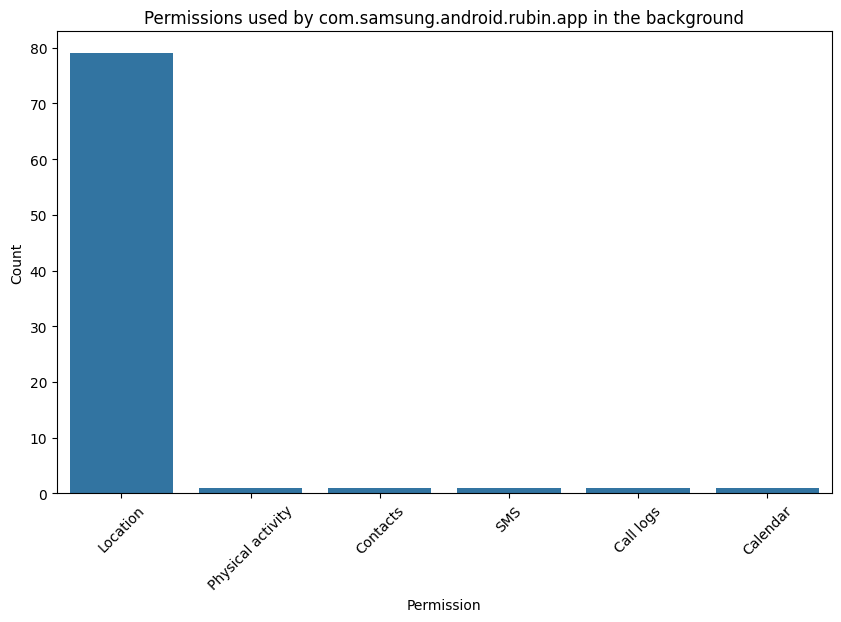

In [132]:
# 1. App A used a permission <X> times in background
# Let's create a function to calculate the number of times each app used a specific permission in the background:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_zscore_1.csv'
data = pd.read_csv(file_path)

# Filter data for background usage
background_data = data[data['isAppInBackground'] == 1]

# Function to count permissions used by each app in the background
def count_permissions_background(app_name):
    app_data = background_data[background_data['packageName'] == app_name]
    permission_counts = app_data['op'].value_counts()
    return permission_counts

# Example usage
permission_counts = count_permissions_background(app_name)
print(f"Permissions used by {app_name} in the background:")
print(permission_counts)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=permission_counts.index, y=permission_counts.values)
plt.title(f'Permissions used by {app_name} in the background')
plt.xlabel('Permission')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [133]:
# 2. App A has used permissions <a,b,c,..> in background and caused battery increase by X% in background compared to foreground
# To determine the battery increase in the background compared to the foreground for an app:
# Function to calculate battery usage difference between background and foreground


# Function to calculate battery usage difference between background and foreground
def battery_increase_background_foreground(app_name):
    app_data = data[data['packageName'] == app_name]
    background_battery = app_data[app_data['isAppInBackground'] == 1]['powerUsage'].sum()
    foreground_battery = app_data[app_data['isAppInBackground'] == 0]['powerUsage'].sum()
    
    # Check if foreground battery usage is zero to avoid division by zero
    if foreground_battery == 0:
        return None  # To avoid division by zero
    
    battery_increase_percentage = ((background_battery - foreground_battery) / foreground_battery) * 100
    return battery_increase_percentage

# Example usage
battery_increase_percentage = battery_increase_background_foreground(app_name)

if battery_increase_percentage is not None:
    print(f"Battery increase for {app_name} in the background compared to the foreground: {battery_increase_percentage:.2f}%")
else:
    print(f"Foreground battery usage for {app_name} is zero, cannot calculate percentage increase.")



Foreground battery usage for com.samsung.android.rubin.app is zero, cannot calculate percentage increase.


Permissions frequently used in background in the last day:
op
Contacts             3
Photos and videos    2
SMS                  1
Music and audio      1
Name: count, dtype: int64


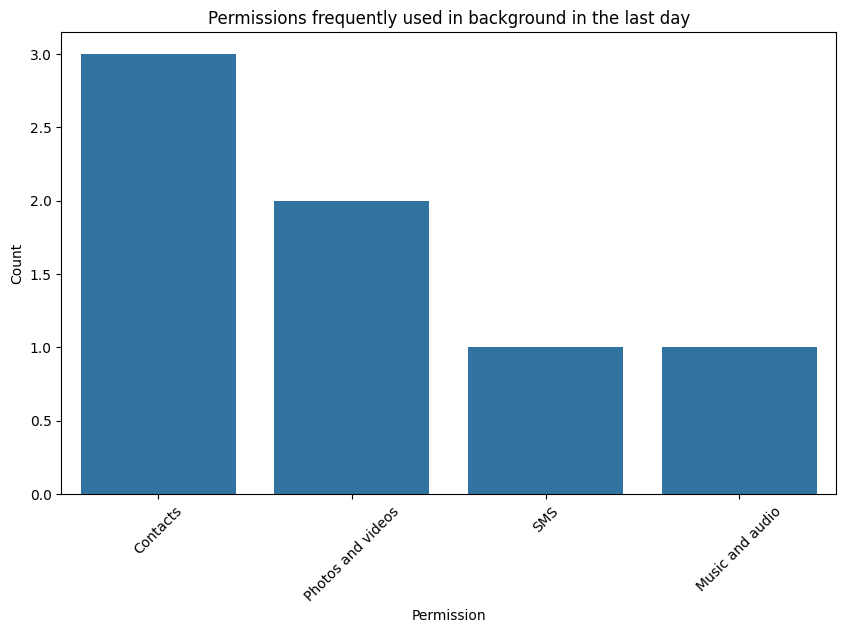

In [134]:
# 3. Permissions <A,B,C,..> were frequently used in background in last day
# To identify the permissions frequently used in the background in the last day:



# Assuming 'Date' column is a numeric identifier and focusing on the last recorded day
last_day = data['Date'].max()
last_day_data = data[data['Date'] == last_day]
background_last_day = last_day_data[last_day_data['isAppInBackground'] == 1]

# Count the frequency of each permission
permissions_last_day = background_last_day['op'].value_counts()
print("Permissions frequently used in background in the last day:")
print(permissions_last_day)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=permissions_last_day.index, y=permissions_last_day.values)
plt.title('Permissions frequently used in background in the last day')
plt.xlabel('Permission')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


CPU Time and WiFi Data Usage for permissions used by com.samsung.android.rubin.app in the background:
                   cpuTime  wifiDataUsage
op                                       
Calendar              7032            209
Call logs             7032            209
Contacts              7032            209
Location            809780           3791
Physical activity     7032            209
SMS                   7032            209


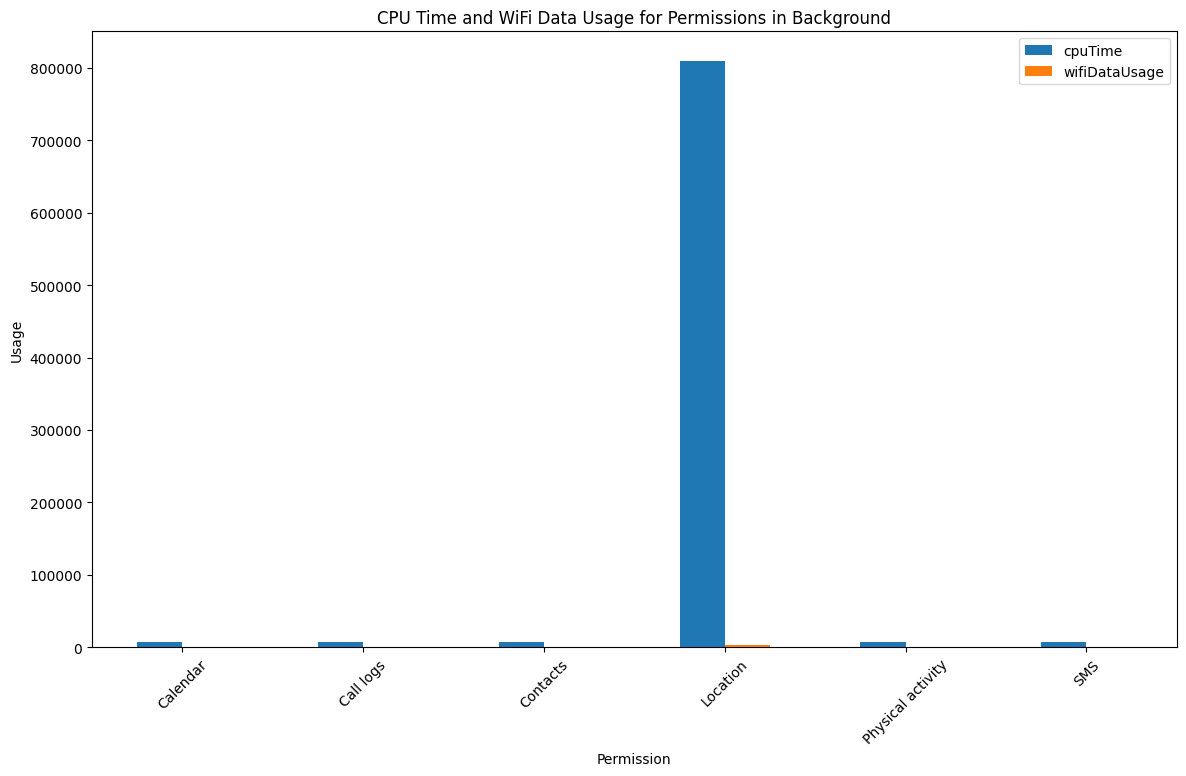

In [135]:
# 4. App A has used permissions <A,B,C,..> in background causing increased CpuTime and Wifi Data usage
# To identify permissions used in the background causing increased CPU time and WiFi data usage:

# Function to analyze CPU time and WiFi data usage for permissions used in the background
def analyze_cpu_wifi_usage(app_name):
    app_data = data[data['packageName'] == app_name]
    background_data = app_data[app_data['isAppInBackground'] == 1]
    cpu_wifi_usage = background_data.groupby('op')[['cpuTime', 'wifiDataUsage']].sum()
    return cpu_wifi_usage

# Example usage
cpu_wifi_usage = analyze_cpu_wifi_usage(app_name)
print(f"CPU Time and WiFi Data Usage for permissions used by {app_name} in the background:")
print(cpu_wifi_usage)

# Plotting the results
cpu_wifi_usage.plot(kind='bar', figsize=(14, 8), title='CPU Time and WiFi Data Usage for Permissions in Background')
plt.xlabel('Permission')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.show()
